## Chicago Crime and Property Analysis
### Over time, does a change in crime, imapct housing prices in Chicago?
## Null Hypothesis
* There is no corelation between %change in crime data & %change in home prices. If crime increases within community, housing price doesn't decrease in that specific community.
## Hypothesis
* An increase in crime, over a period, will negatively impact home prices in an Chicago community. Conversely, a decrease in crime, over a period, will positively impact home prices in an Chicago community.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)

In [2]:
merged_df = pd.read_csv("C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/merged_df_2.csv")

In [3]:
merged_df.head(2)

,style,beds,full_baths,sold_price,last_sold_date,latitude,longitude,community,Neighborhood,year,Crime_Rate_per_1000,Income_Per_Capita,Employment_Rate
0,MULTI_FAMILY,4.0,2.0,85000.0,2015-01-30,41.774262,-87.660084,WEST ENGLEWOOD,West Side,2015,25.872026,763.33093,0.299174
1,OTHER,6.0,3.0,20000.0,2015-01-29,41.772228,-87.671654,WEST ENGLEWOOD,West Side,2015,25.872026,763.33093,0.299174


In [4]:
# calculate year-over-year percentage change in Crime Rate and Sold Price
merged_df['Crime_Rate_per_1000_pct_change'] = merged_df.groupby('community')['Crime_Rate_per_1000'].pct_change() * 100
merged_df['sold_price_pct_change'] = merged_df.groupby('community')['sold_price'].pct_change() * 100

C:\Users\Rashid\AppData\Local\Temp\ipykernel_1968\1267259671.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged_df['Crime_Rate_per_1000_pct_change'] = merged_df.groupby('community')['Crime_Rate_per_1000'].pct_change() * 100


In [5]:
merged_df.dropna(subset=['Crime_Rate_per_1000_pct_change', 'sold_price_pct_change'], inplace=True)


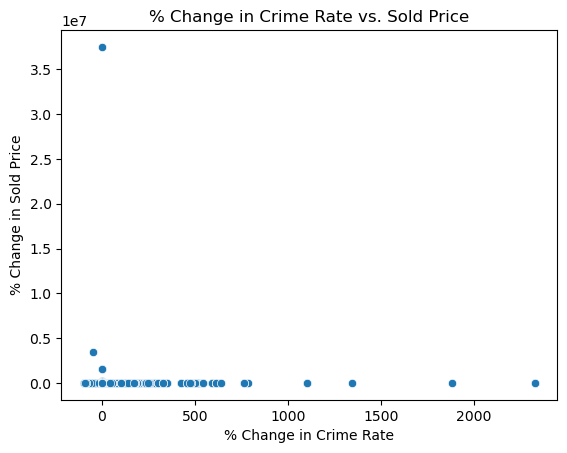

Correlation: -0.0007125924724531066, P-value: 0.7493893921898147
                              OLS Regression Results                             
Dep. Variable:     sold_price_pct_change   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.1020
Date:                   Wed, 15 May 2024   Prob (F-statistic):              0.749
Time:                           08:24:41   Log-Likelihood:            -2.5641e+06
No. Observations:                 200962   AIC:                         5.128e+06
Df Residuals:                     200960   BIC:                         5.128e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [6]:
# scatter plot to visualize the relationship
sns.scatterplot(x='Crime_Rate_per_1000_pct_change', y='sold_price_pct_change', data=merged_df)
plt.xlabel('% Change in Crime Rate')
plt.ylabel('% Change in Sold Price')
plt.title('% Change in Crime Rate vs. Sold Price')
plt.show()

# correlation
correlation, p_value = stats.pearsonr(merged_df['Crime_Rate_per_1000_pct_change'], merged_df['sold_price_pct_change'])
print(f'Correlation: {correlation}, P-value: {p_value}')

# regression Analysis
X = merged_df['Crime_Rate_per_1000_pct_change']
Y = merged_df['sold_price_pct_change']
X = sm.add_constant(X)  

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())


## Results of Statistical Analysis

### Correlation:
- **Correlation coefficient:** -0.0007
  - This very small negative value indicates a negligible linear relationship between the percentage change in crime rates and the percentage change in housing prices.
- **P-value:** 0.749
  - Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This means that any observed correlation is not statistically significant.

### Regression Analysis:
- **R-squared:** 0.000
  - This indicates that 0% of the variance in the percentage change in sold prices is explained by the percentage change in crime rates.
- **F-statistic:** 0.1020, **Prob (F-statistic):** 0.749
  - The F-statistic and its p-value indicate that the overall regression model is not statistically significant.
- **Coefficient for Crime_Rate_per_1000_pct_change:** -4.2081 with a p-value of 0.749
  - This suggests that changes in crime rates do not have a statistically significant impact on changes in housing prices.

### Conclusion
Based on these results, we do not have sufficient evidence to reject the null hypothesis. This implies that, according to the data and the analysis conducted, changes in crime rates do not significantly impact housing prices in Chicago communities.
go communities.


## Further Aanalysis

We include additional variables that might affect housing prices, such as economic conditions and changes in employment rates.

In [7]:
merged_df['Income_Per_Capita_pct_change'] = merged_df.groupby('community')['Income_Per_Capita'].pct_change() * 100
merged_df['Employment_Rate_pct_change'] = merged_df.groupby('community')['Employment_Rate'].pct_change() * 100

merged_df.dropna(subset=['Crime_Rate_per_1000_pct_change', 'sold_price_pct_change', 'Income_Per_Capita_pct_change', 'Employment_Rate_pct_change'], inplace=True)

# regression Analysis with additional variables
X = merged_df[['Crime_Rate_per_1000_pct_change', 'Income_Per_Capita_pct_change', 'Employment_Rate_pct_change']]
Y = merged_df['sold_price_pct_change']
X = sm.add_constant(X)  

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     sold_price_pct_change   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.265
Date:                   Wed, 15 May 2024   Prob (F-statistic):              0.285
Time:                           08:24:49   Log-Likelihood:            -2.5632e+06
No. Observations:                 200887   AIC:                         5.126e+06
Df Residuals:                     200883   BIC:                         5.126e+06
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

## Results Interpretation

- **R-squared:** 0.000
  - This indicates that 0% of the variance in the percentage change in sold prices is explained by the model, which includes changes in crime rates, income, and employment rates.
- **F-statistic:** 1.265, **Prob (F-statistic):** 0.285
  - The F-statistic and its p-value indicate that the overall regression model is not statistically significant.

### Coefficients and P-values:

- **Crime_Rate_per_1000_pct_change:** 
  - Coefficient = -4.0143, p-value = 0.761
  - The p-value is much greater than 0.05, indicating that the effect of changes in crime rates on sold prices is not statistically significant.
  
- **Income_Per_Capita_pct_change:** 
  - Coefficient = 280.7785, p-value = 0.345
  - The p-value is greater than 0.05, indicating that the effect of changes in income per capita on sold prices is not statistically significant.
  
- **Employment_Rate_pct_change:** 
  - Coefficient = -883.6544, p-value = 0.062
  - The p-value is close to 0.05 but still not less than 0.05, indicating that the effect of changes in employment rates on sold prices is marginally significant.

## Conclusion

Based on these results, we still fail to reject the null hypothesis. The data that includes additional variables does not provide sufficient evidence to support the hypothesis that changes in crime rates have a significant impact on housing prices in Chicago communities.
